In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv(r"/content/car details.csv")

In [ ]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.shape

(7385, 12)

In [ ]:
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


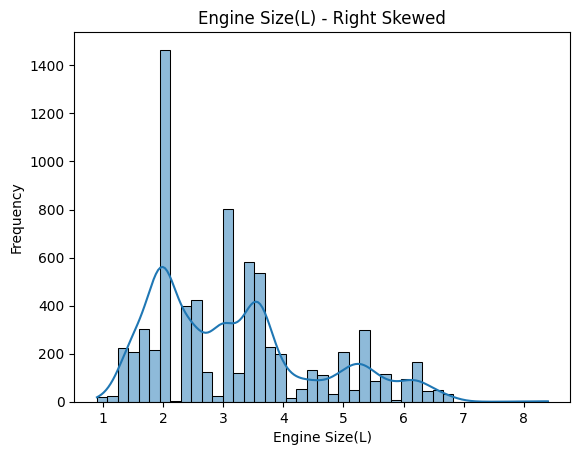

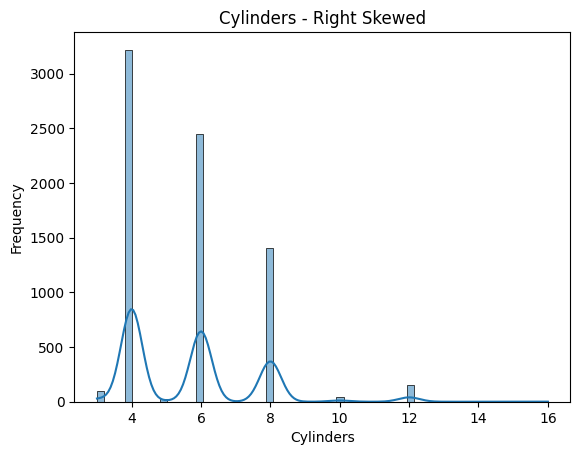

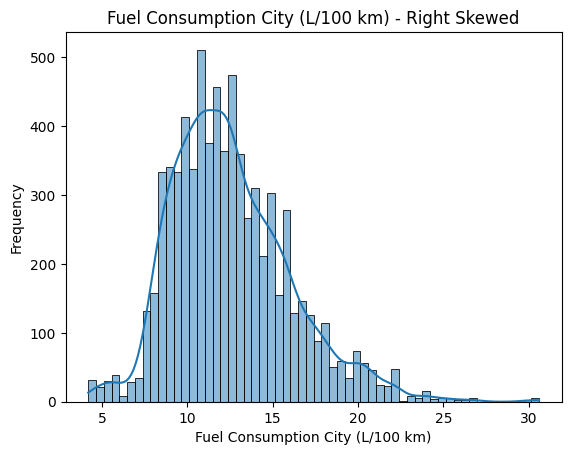

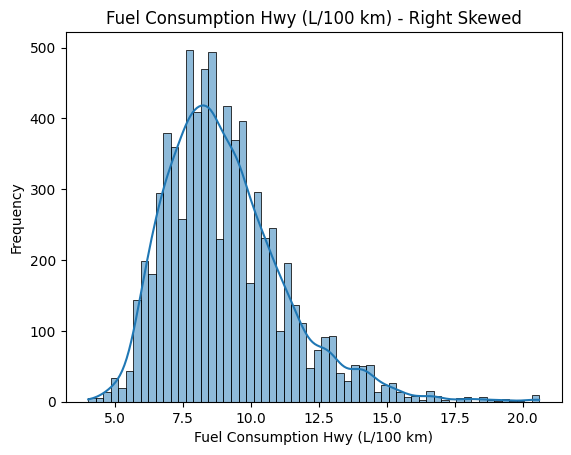

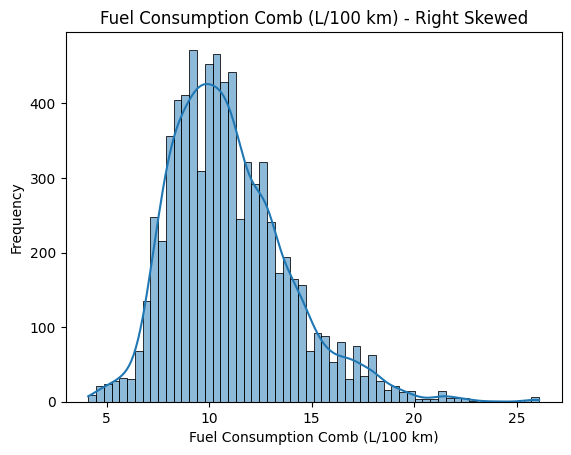

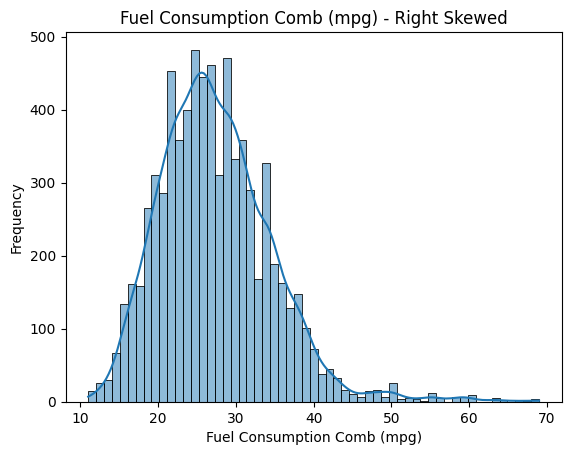

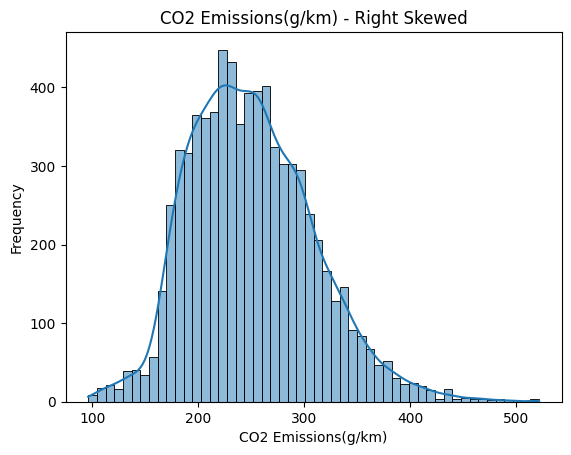

In [ ]:
from scipy.stats import skew
for i in df.select_dtypes(include=["number"]):
    if skew(df[i]) > 0:
        direction = 'Right Skewed'
    elif skew(df[i]) < 0:
         direction = 'Left Skewed'
    else:
         direction = 'Normal'
    sns.histplot(df[i], kde=True)
    plt.title(f'{i} - {direction}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

Engine Size(L)


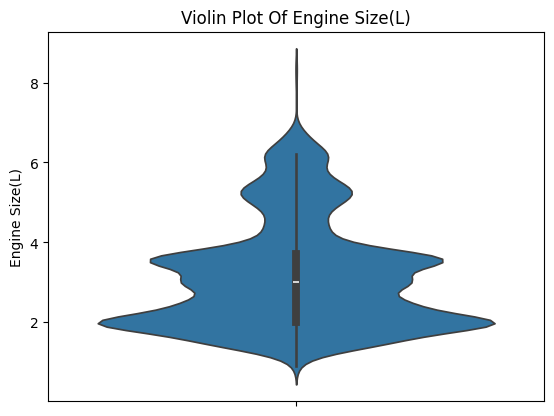

Cylinders


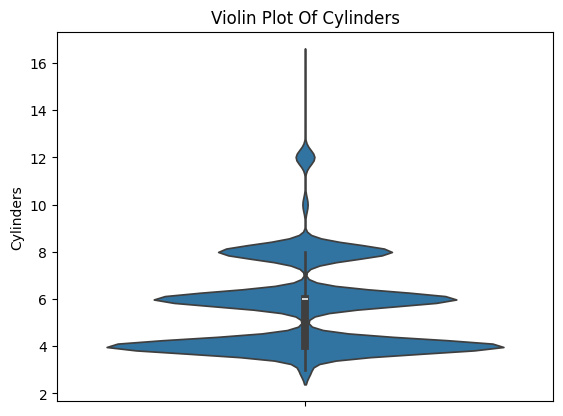

Fuel Consumption City (L/100 km)


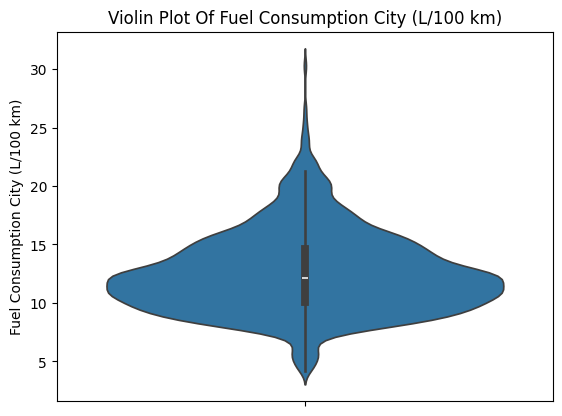

Fuel Consumption Hwy (L/100 km)


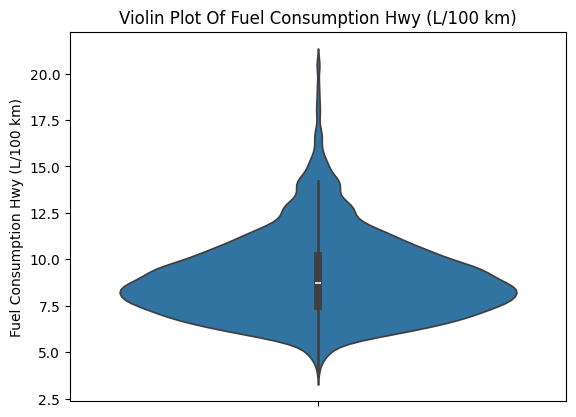

Fuel Consumption Comb (L/100 km)


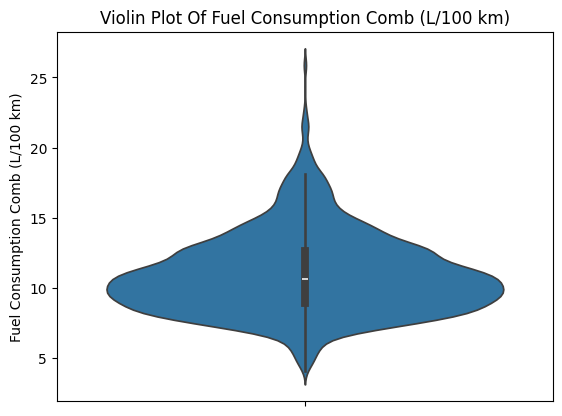

Fuel Consumption Comb (mpg)


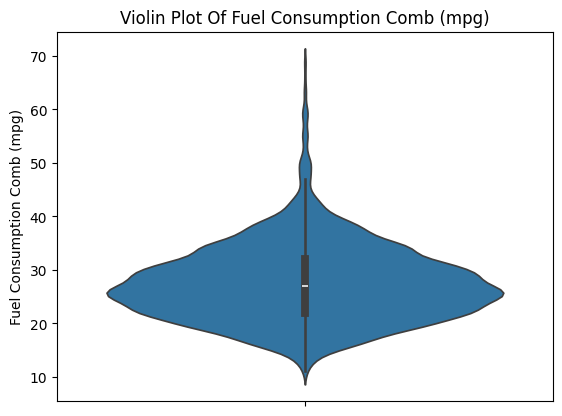

CO2 Emissions(g/km)


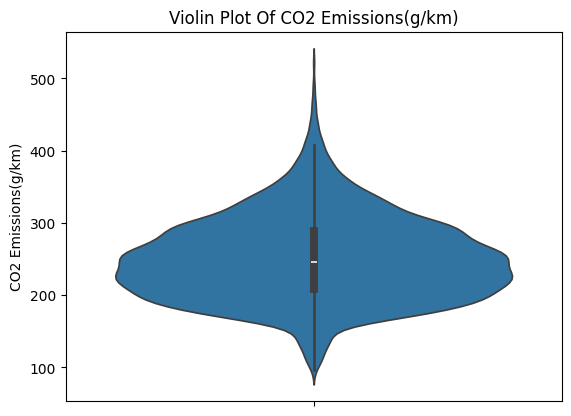

In [ ]:
for i in df.select_dtypes(include="number"):
  sns.violinplot(df[i])
  print(i)
  plt.title(f"Violin Plot Of {i}")
  plt.show()

In [ ]:
outliers=["Engine Size(L)","Cylinders","Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)",
          "Fuel Consumption Comb (L/100 km)","Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]
for i in outliers:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  upper=q3+(1.5*iqr)
  lower=q1-(1.5*iqr)
  df=df[(df[i]>=lower) & (df[i]<=upper)]

Engine Size(L)


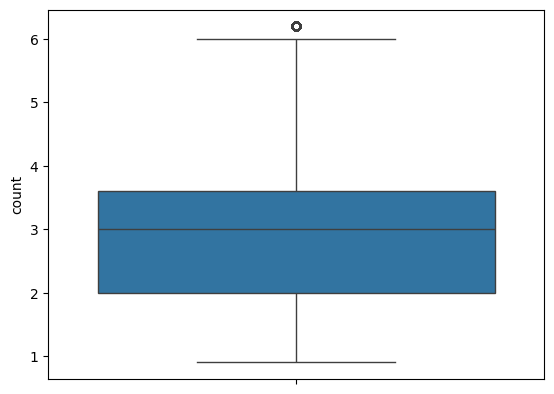

Cylinders


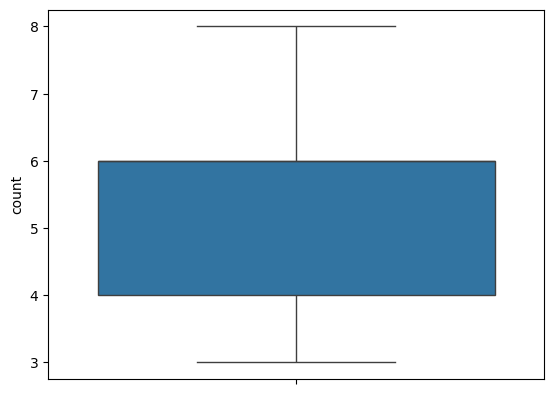

Fuel Consumption City (L/100 km)


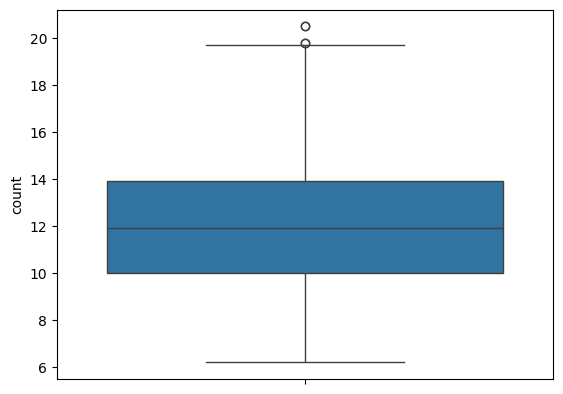

Fuel Consumption Hwy (L/100 km)


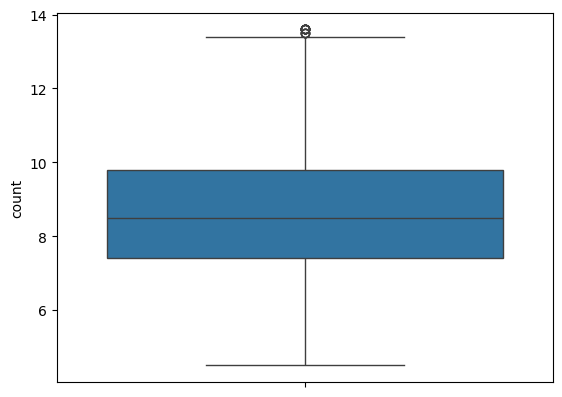

Fuel Consumption Comb (L/100 km)


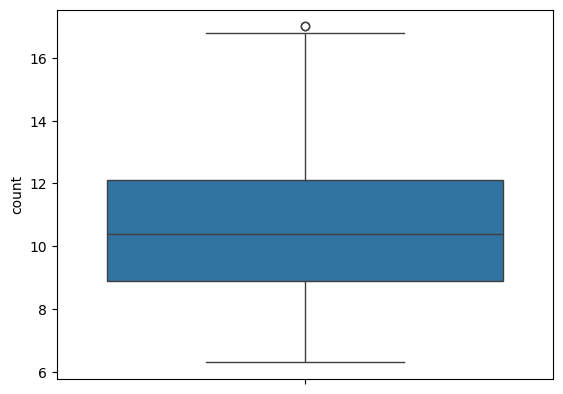

Fuel Consumption Comb (mpg)


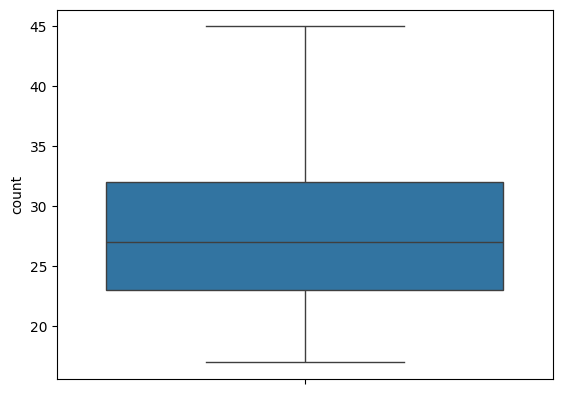

CO2 Emissions(g/km)


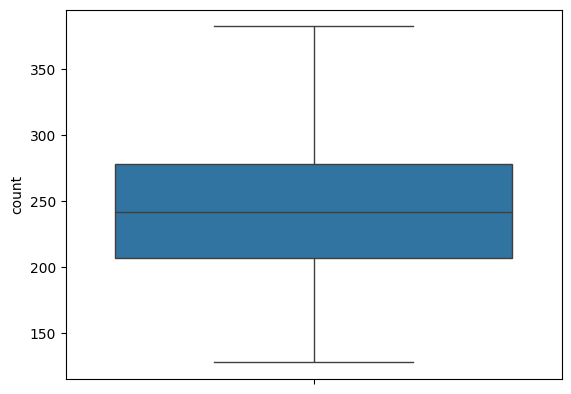

In [ ]:
for i in df.select_dtypes(include="number"):
  sns.boxplot(df[i])
  print(i)
  plt.ylabel("count")
  plt.show()

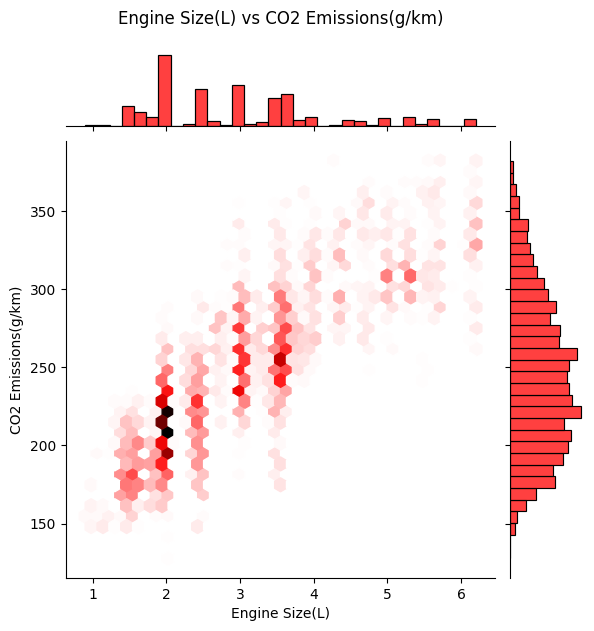

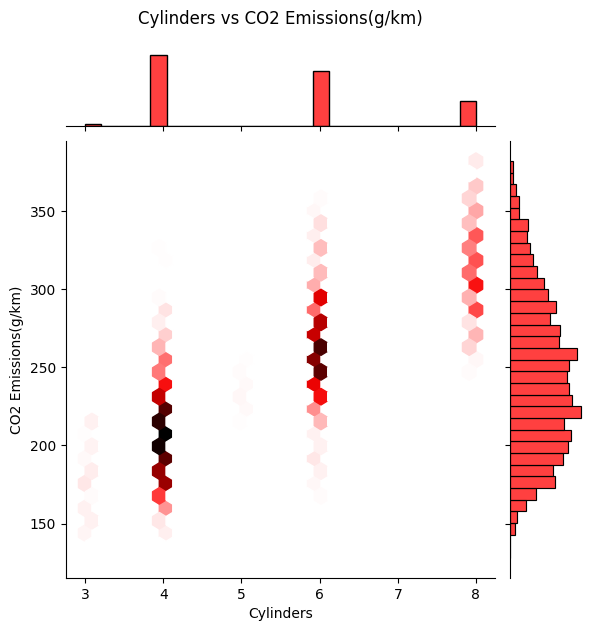

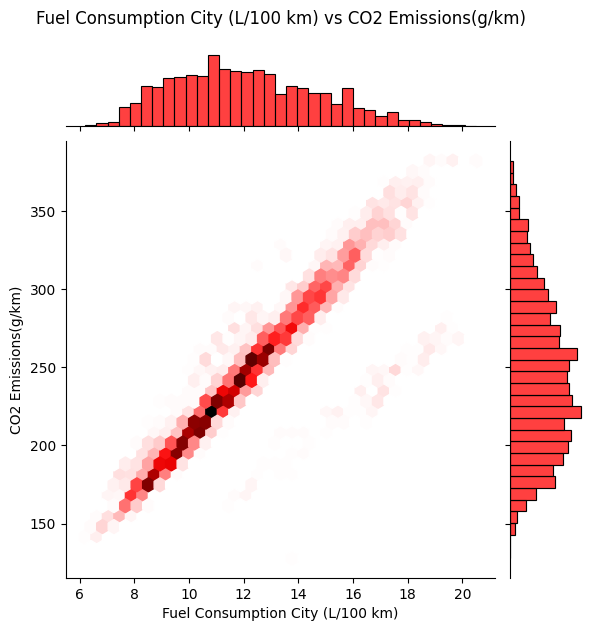

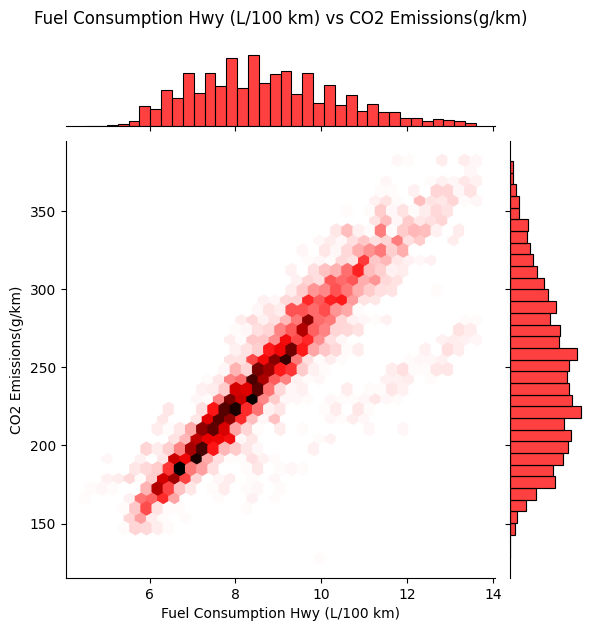

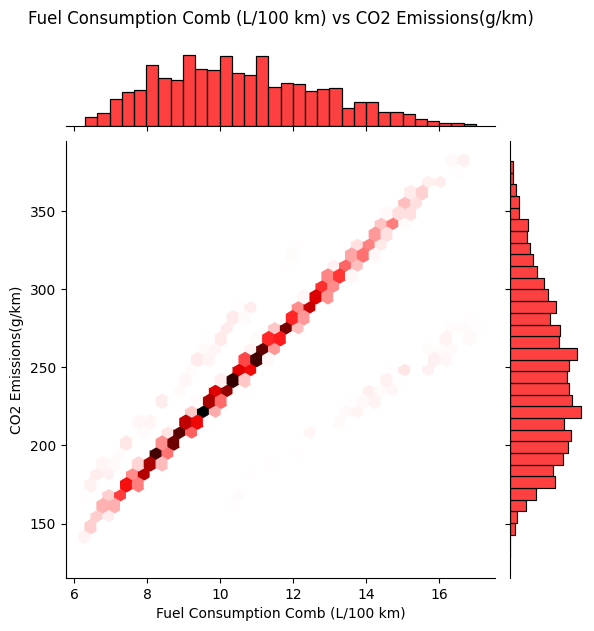

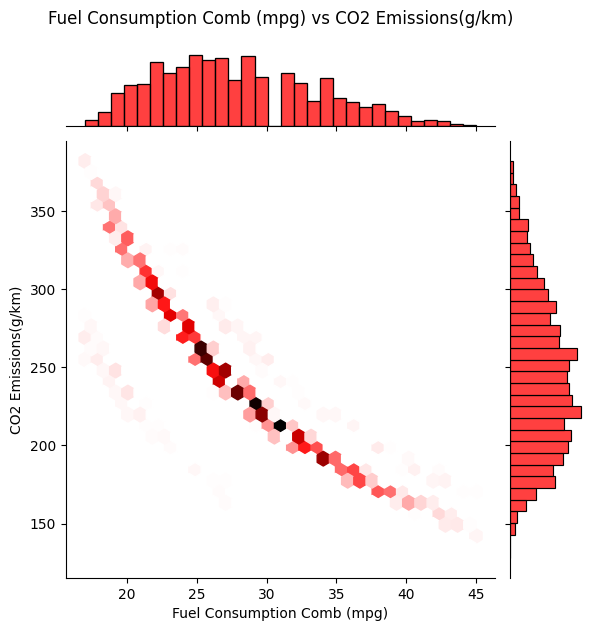

In [ ]:
for i in df.select_dtypes(include=["number"]):
  if (i!="CO2 Emissions(g/km)"):
    sns.jointplot(x=i,y="CO2 Emissions(g/km)",data=df,kind="hex",color="red")
    plt.title(f"{i} vs CO2 Emissions(g/km)",y=1.25)
    plt.xlabel(i)
    plt.ylabel("CO2 Emissions(g/km)")
    plt.show()

Engine Size(L)


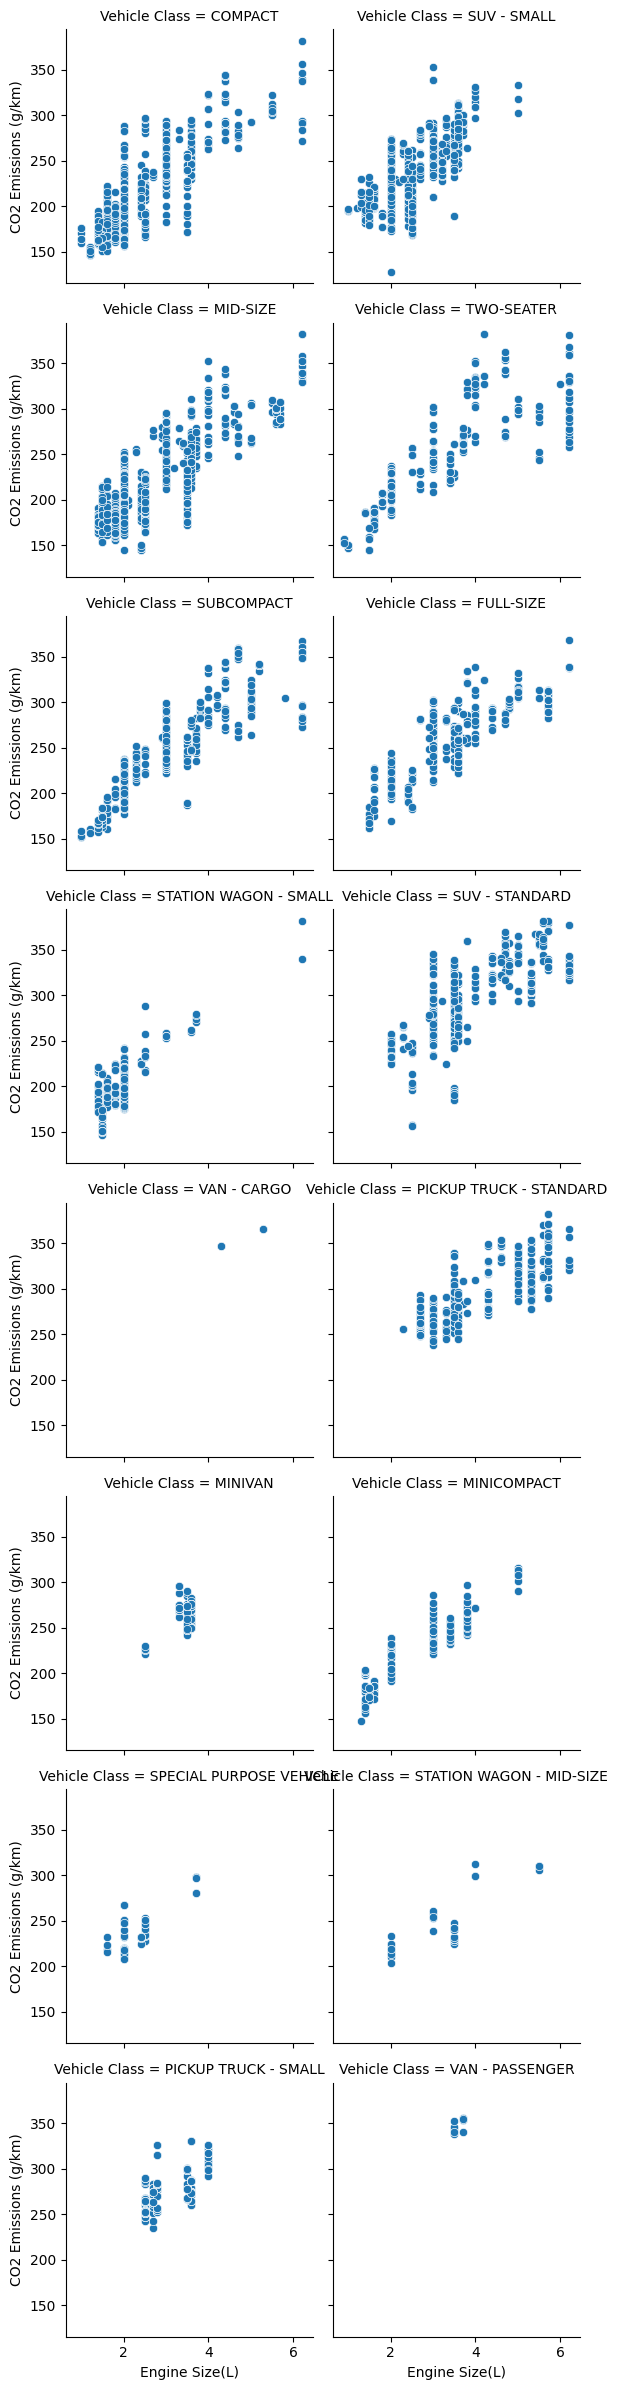

Cylinders


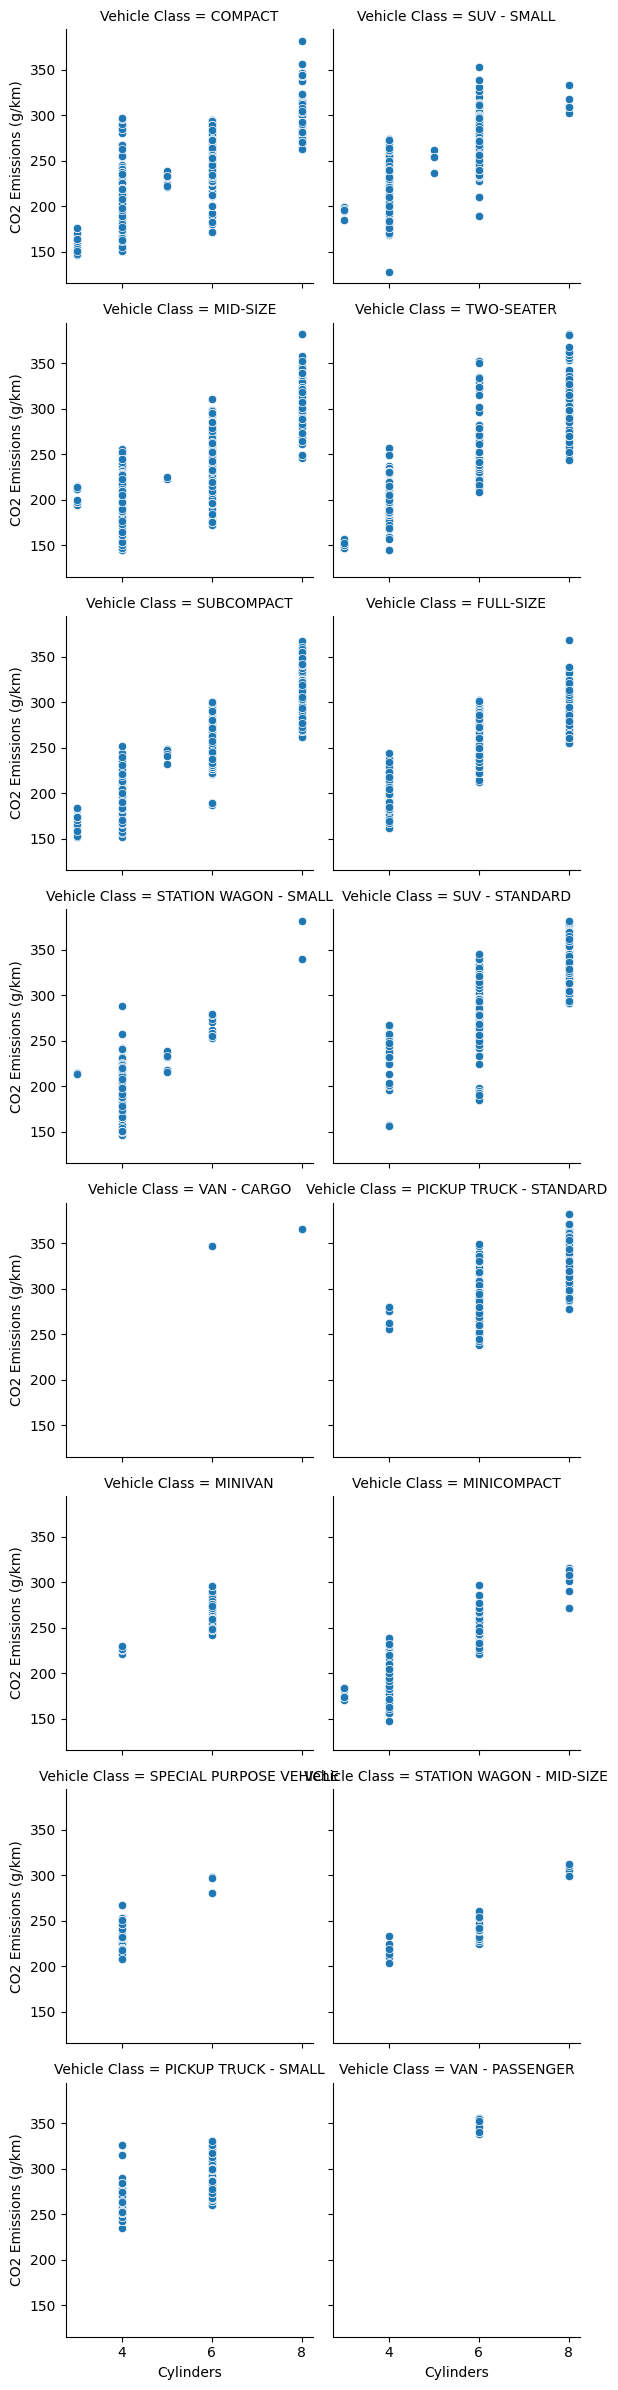

Fuel Consumption City (L/100 km)


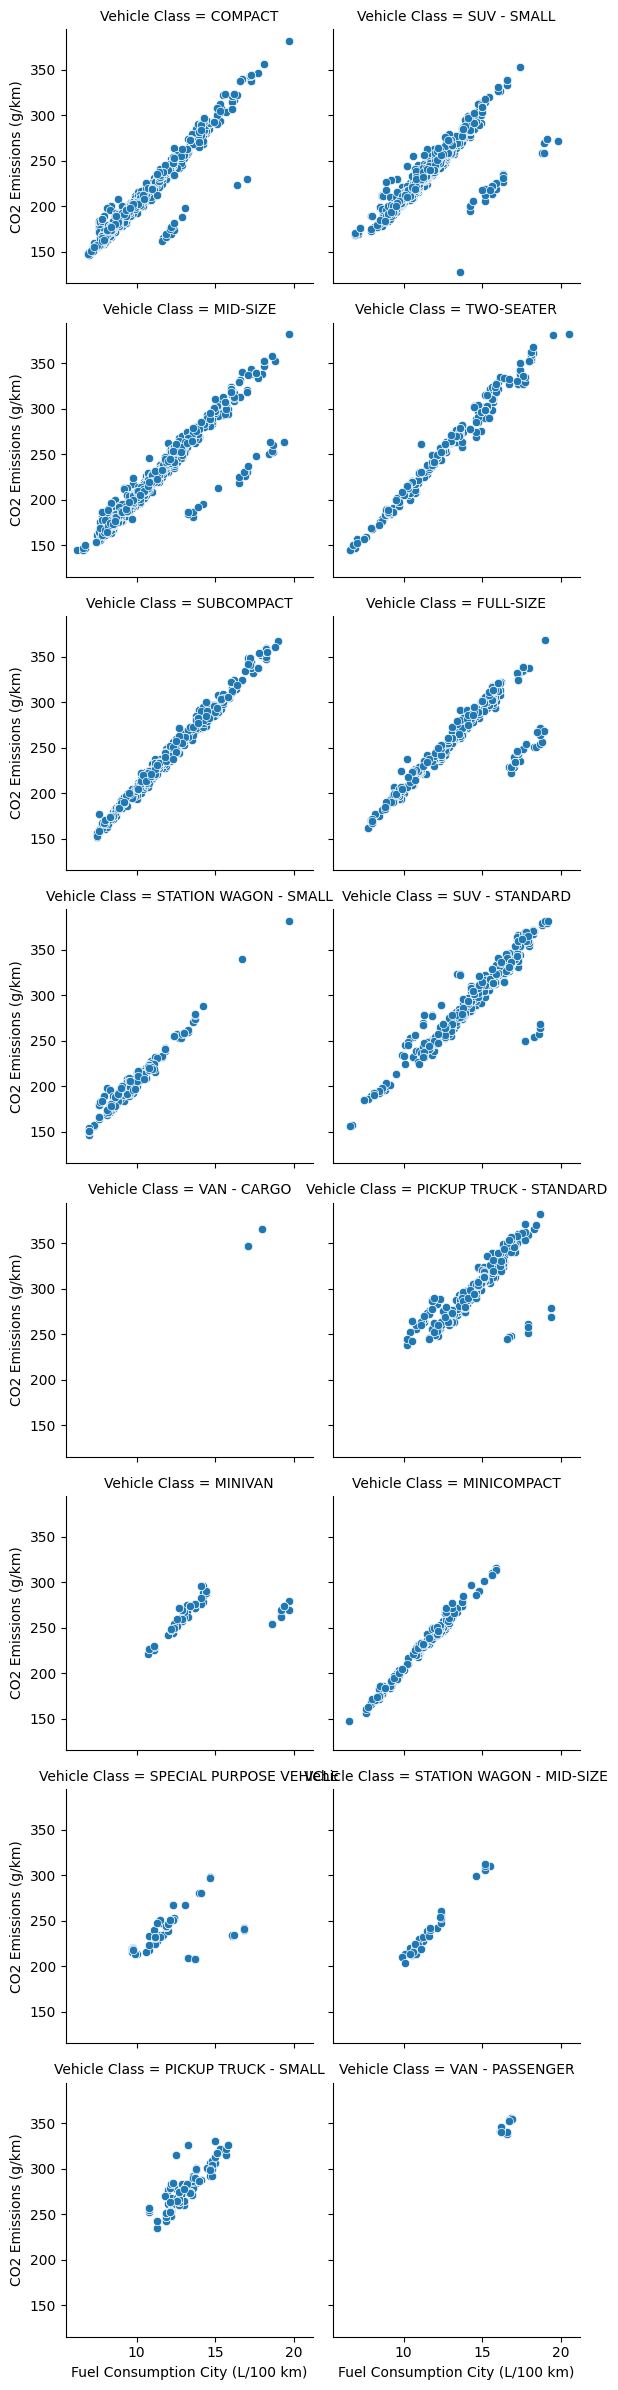

Fuel Consumption Hwy (L/100 km)


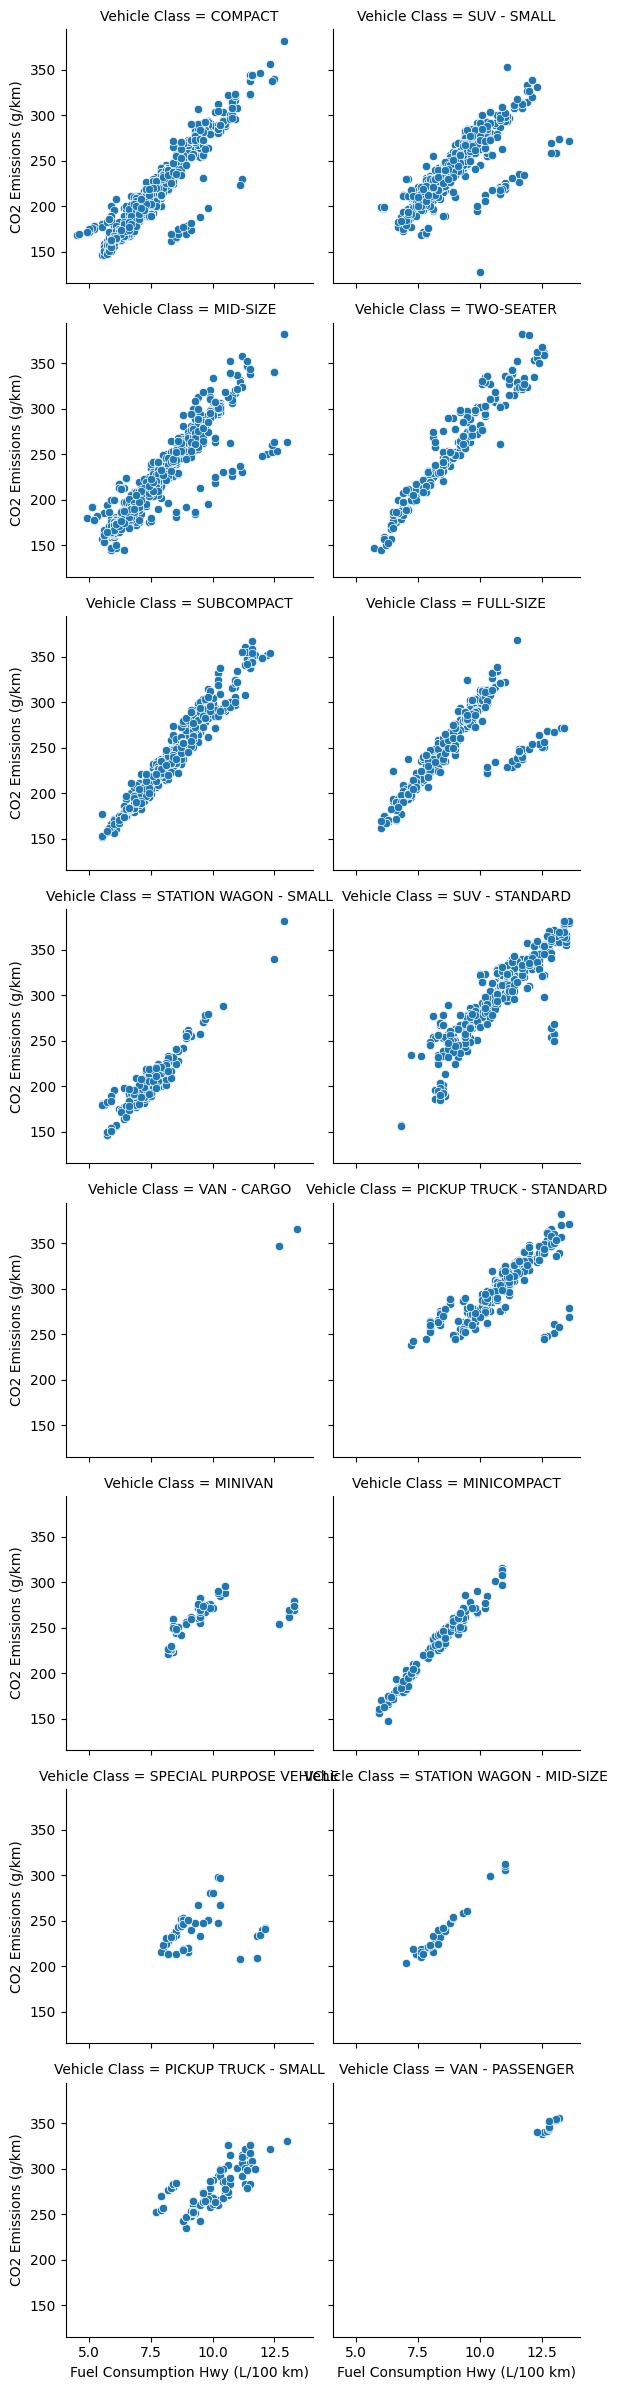

Fuel Consumption Comb (L/100 km)


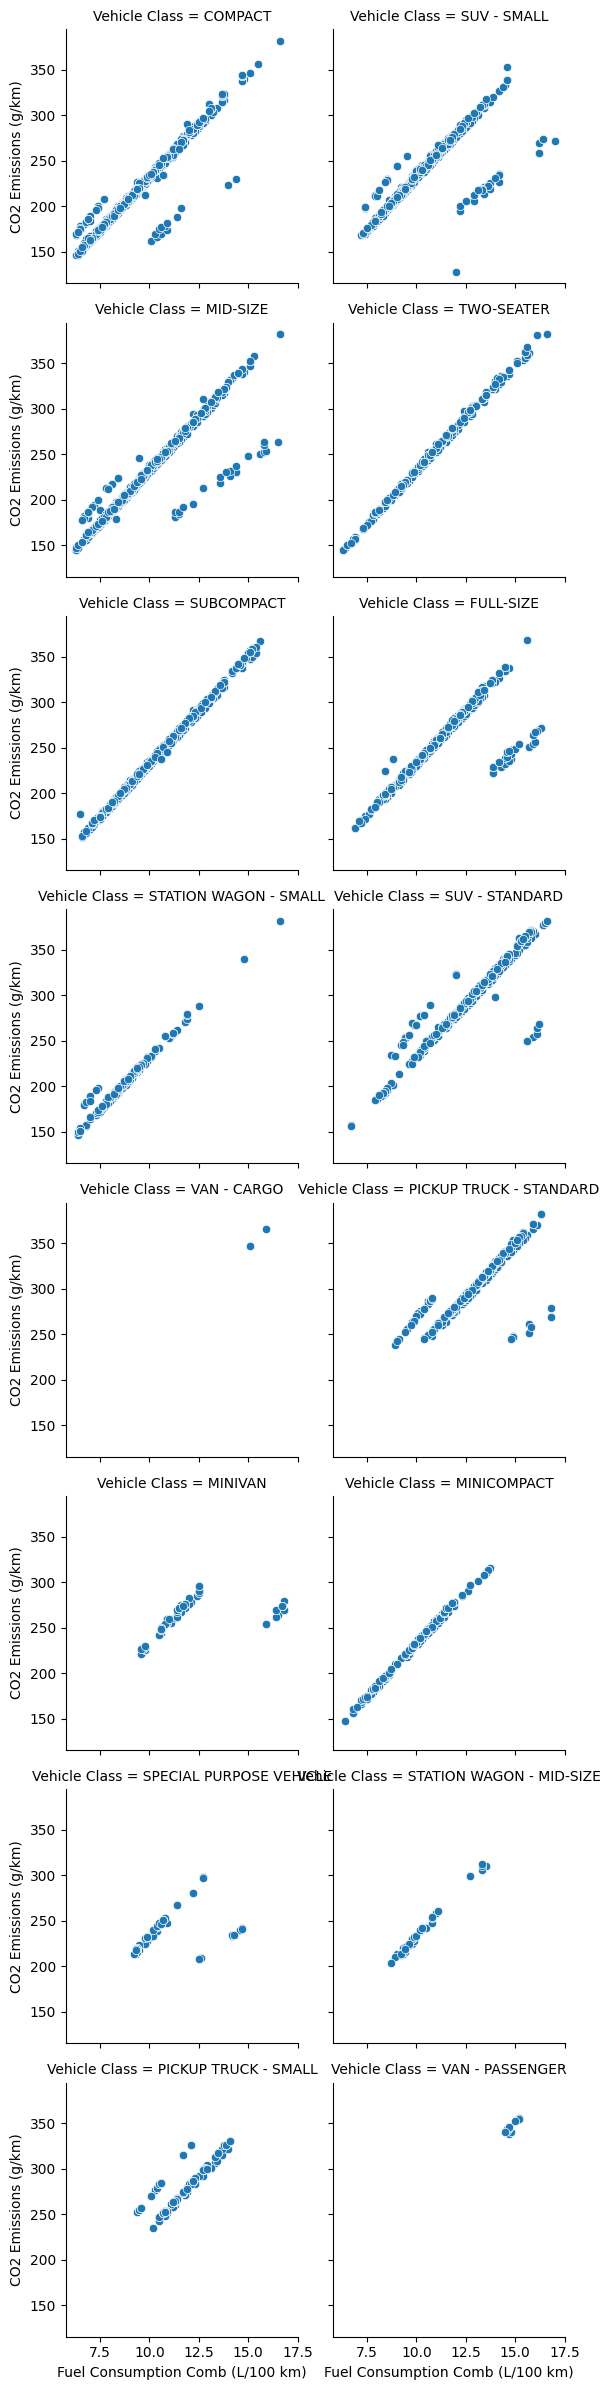

Fuel Consumption Comb (mpg)


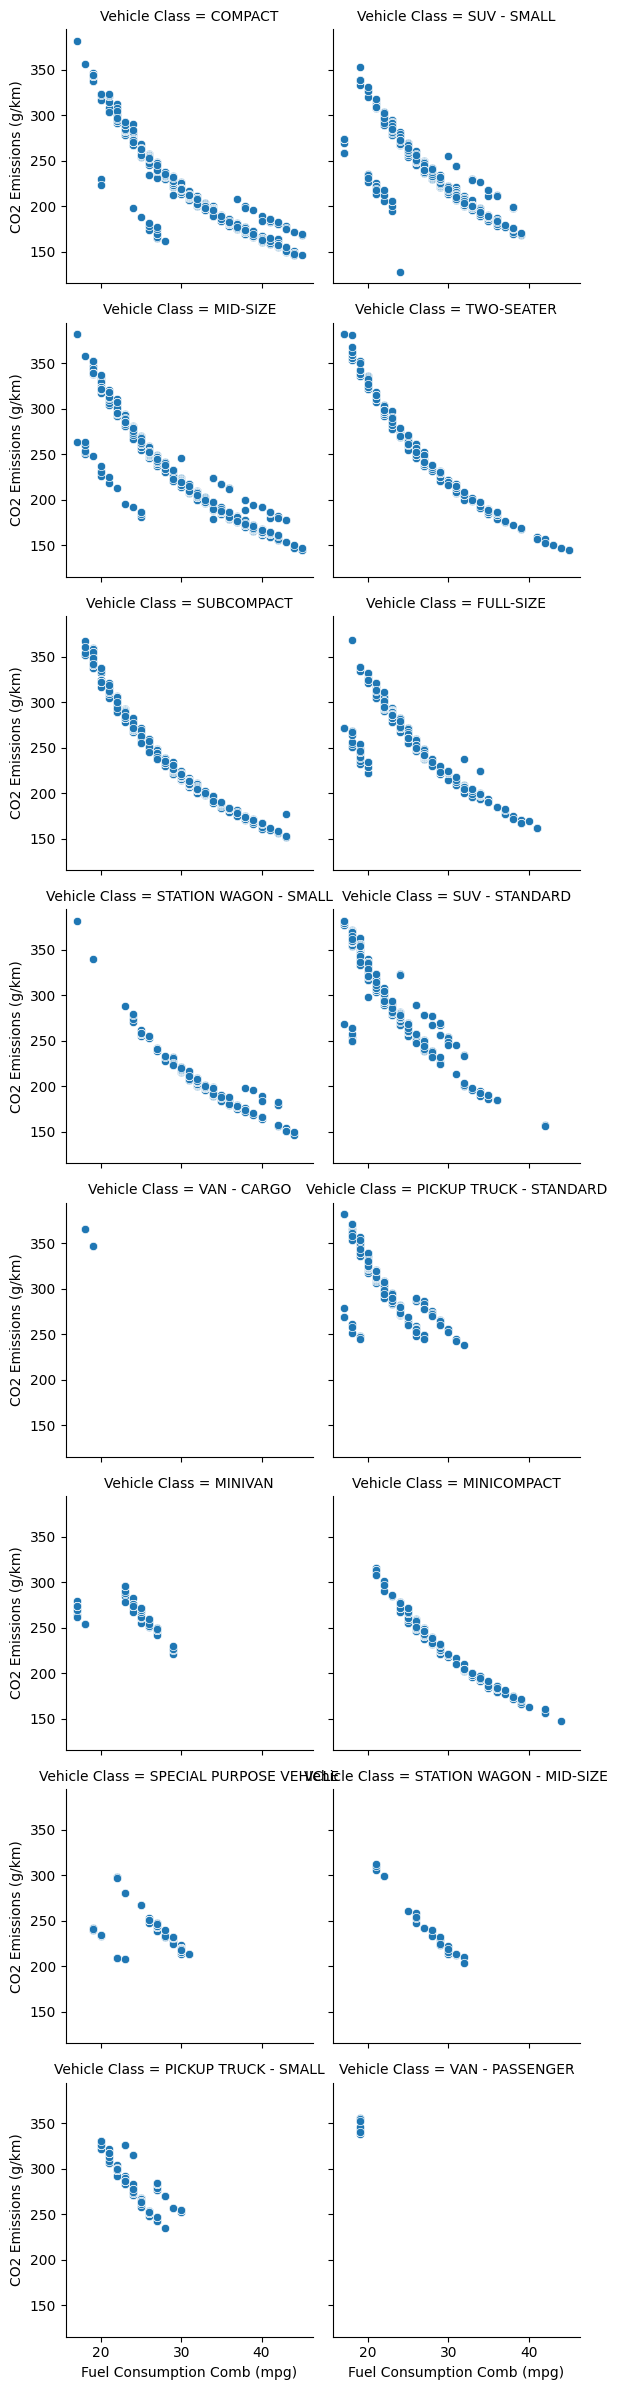

In [ ]:
for i in df.select_dtypes(include=["number"]):
  if (i!="CO2 Emissions(g/km)"):
        g = sns.FacetGrid(df, col='Vehicle Class',col_wrap=2)
        g.map(sns.scatterplot, i, 'CO2 Emissions(g/km)')
        print(i)
        g.set_axis_labels(i,'CO2 Emissions (g/km)')
        plt.show()

In [ ]:
for i in df.select_dtypes(include=['object']).columns:
  print(df[i].value_counts())
  print()

Make
FORD             543
BMW              520
CHEVROLET        502
PORSCHE          376
MERCEDES-BENZ    373
TOYOTA           278
AUDI             266
NISSAN           257
GMC              245
JEEP             241
KIA              214
DODGE            205
MINI             204
HONDA            204
VOLKSWAGEN       194
HYUNDAI          192
MAZDA            180
LEXUS            163
CADILLAC         156
JAGUAR           154
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
LINCOLN           89
RAM               88
MITSUBISHI        88
CHRYSLER          87
LAND ROVER        77
FIAT              73
ACURA             70
MASERATI          61
ALFA ROMEO        30
GENESIS           25
ASTON MARTIN      22
SCION             21
BENTLEY           17
SMART              7
Name: count, dtype: int64

Model
MUSTANG               27
FOCUS FFV             24
F-150 FFV             22
SONIC 5               20
F-150                 20
                      ..
550i xDRIVE SE

In [ ]:
df["Vehicle Class"].value_counts()

,count
Vehicle Class,
SUV - SMALL,1213
MID-SIZE,1020
COMPACT,970
SUV - STANDARD,611
SUBCOMPACT,591
FULL-SIZE,555
PICKUP TRUCK - STANDARD,427
TWO-SEATER,383
MINICOMPACT,310


In [ ]:
df["Transmission"].value_counts()

,count
Transmission,
AS6,1272
AS8,1117
M6,877
A6,629
A8,423
AM7,386
A9,332
AS7,289
AV,216


In [ ]:
minimum =100
counts = df['Vehicle Class'].value_counts()
rare_categories = counts[counts < minimum].index
df['Vehicle Class'] = df['Vehicle Class'].replace(rare_categories, 'Special')


In [ ]:
df['Vehicle Class'] = df['Vehicle Class'].replace({'SUV - SMALL': 'SUV(SM,ST)','SUV - STANDARD': 'SUV(SM,ST)','PICKUP TRUCK - STANDARD':
                      'PICKUP TRUCK(SM,ST)','PICKUP TRUCK - SMALL':'PICKUP TRUCK(SM,ST)','SUBCOMPACT':'COMPACT(C,SC,MC)',
                                                   'MINICOMPACT': 'COMPACT(C,SC,MC)', 'COMPACT':'COMPACT(C,SC,MC)'})


In [ ]:
df["Vehicle Class"].value_counts()

,count
Vehicle Class,
"COMPACT(C,SC,MC)",1871
"SUV(SM,ST)",1824
MID-SIZE,1020
"PICKUP TRUCK(SM,ST)",586
FULL-SIZE,555
TWO-SEATER,383
STATION WAGON - SMALL,240
Special,218


In [ ]:
minimum =50
counts = df['Transmission'].value_counts()
rare_categories = counts[counts < minimum].index
df['Transmission'] = df['Transmission'].replace(rare_categories, 'Rare')

In [ ]:
df['Transmission']=df['Transmission'].replace({'AS6':'Automatic Shift', 'AS8':'Automatic Shift', 'AS7':'Automatic Shift',
                                               'AS9':'Automatic Shift', 'AS10':'Automatic Shift'})

In [ ]:
df['Transmission']=df['Transmission'].replace({'A6':'Automatic', 'A8':'Automatic', 'A9':'Automatic', 'A5':'Automatic'})

In [ ]:
df['Transmission']=df['Transmission'].replace({'M6':'Manual', 'M5':'Manual', 'M7':'Manual'})

In [ ]:
df['Transmission']=df['Transmission'].replace({'AM7':'Automated Manual', 'AM6':'Automated Manual', 'AM8':'Automated Manual'})

In [ ]:
df['Transmission']=df['Transmission'].replace({'AV':'Automatic Variable', 'AV6':'Automatic Variable', 'AV7':'Automatic Variable'})

In [ ]:
df["Transmission"].value_counts()

,count
Transmission,
Automatic Shift,2905
Automatic,1462
Manual,1160
Automated Manual,547
Automatic Variable,431
Rare,192


In [ ]:
dummy=df

In [ ]:
from sklearn.preprocessing import OneHotEncoder
data = pd.DataFrame(df)
en = OneHotEncoder(sparse_output=False)
columns_encode= ['Transmission', 'Vehicle Class']
en_data = en.fit_transform(df[columns_encode])
encoded_df = pd.DataFrame(en_data, columns=en.get_feature_names_out(columns_encode))
df= pd.concat([df.drop(columns_encode, axis=1), encoded_df], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7310 entries, 0 to 6640
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Make                                 6697 non-null   object 
 1   Model                                6697 non-null   object 
 2   Engine Size(L)                       6697 non-null   float64
 3   Cylinders                            6697 non-null   float64
 4   Fuel Type                            6697 non-null   object 
 5   Fuel Consumption City (L/100 km)     6697 non-null   float64
 6   Fuel Consumption Hwy (L/100 km)      6697 non-null   float64
 7   Fuel Consumption Comb (L/100 km)     6697 non-null   float64
 8   Fuel Consumption Comb (mpg)          6697 non-null   float64
 9   CO2 Emissions(g/km)                  6697 non-null   float64
 10  Transmission_Automated Manual        6697 non-null   float64
 11  Transmission_Automatic             

In [ ]:
df.head()

,Make,Model,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),...,Transmission_Manual,Transmission_Rare,"Vehicle Class_COMPACT(C,SC,MC)",Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,"Vehicle Class_PICKUP TRUCK(SM,ST)",Vehicle Class_STATION WAGON - SMALL,"Vehicle Class_SUV(SM,ST)",Vehicle Class_Special,Vehicle Class_TWO-SEATER
0,ACURA,ILX,2.0,4.0,Z,9.9,6.7,8.5,33.0,196.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACURA,ILX,2.4,4.0,Z,11.2,7.7,9.6,29.0,221.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ACURA,MDX 4WD,3.5,6.0,Z,12.7,9.1,11.1,25.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,ACURA,RDX AWD,3.5,6.0,Z,12.1,8.7,10.6,27.0,244.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,ACURA,RLX,3.5,6.0,Z,11.9,7.7,10.0,28.0,230.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

,0
Make,613
Model,613
Engine Size(L),613
Cylinders,613
Fuel Type,613
Fuel Consumption City (L/100 km),613
Fuel Consumption Hwy (L/100 km),613
Fuel Consumption Comb (L/100 km),613
Fuel Consumption Comb (mpg),613
CO2 Emissions(g/km),613


In [ ]:
for i in df.select_dtypes(include=["object"]):
  df[i]=df[i].fillna(df[i].mode()[0])
  print(i)

Make
FORD
Model
MUSTANG
Fuel Type
X


In [ ]:
for i in df.select_dtypes(include =["number"]):
  if(df[i].skew()>0.5):
    df[i]=df[i].fillna(df[i].median())
    print(i,"skewed")
  else:
    df[i]=df[i].fillna(df[i].mean())
    print(i,"not skewed")

Engine Size(L) skewed
Cylinders skewed
Fuel Consumption City (L/100 km) not skewed
Fuel Consumption Hwy (L/100 km) not skewed
Fuel Consumption Comb (L/100 km) not skewed
Fuel Consumption Comb (mpg) not skewed
CO2 Emissions(g/km) not skewed
Transmission_Automated Manual skewed
Transmission_Automatic skewed
Transmission_Automatic Shift not skewed
Transmission_Automatic Variable skewed
Transmission_Manual skewed
Transmission_Rare skewed
Vehicle Class_COMPACT(C,SC,MC) skewed
Vehicle Class_FULL-SIZE skewed
Vehicle Class_MID-SIZE skewed
Vehicle Class_PICKUP TRUCK(SM,ST) skewed
Vehicle Class_STATION WAGON - SMALL skewed
Vehicle Class_SUV(SM,ST) skewed
Vehicle Class_Special skewed
Vehicle Class_TWO-SEATER skewed


In [ ]:
df.isnull().sum()

,0
Make,0
Model,0
Engine Size(L),0
Cylinders,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0
Fuel Consumption Comb (mpg),0
CO2 Emissions(g/km),0


In [ ]:
x=df
y=df["CO2 Emissions(g/km)"]

In [ ]:
x = x.drop(["CO2 Emissions(g/km)", "Make", 'Model', 'Fuel Type'], axis=1)


In [ ]:
x

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Transmission_Automated Manual,Transmission_Automatic,Transmission_Automatic Shift,Transmission_Automatic Variable,Transmission_Manual,Transmission_Rare,"Vehicle Class_COMPACT(C,SC,MC)",Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,"Vehicle Class_PICKUP TRUCK(SM,ST)",Vehicle Class_STATION WAGON - SMALL,"Vehicle Class_SUV(SM,ST)",Vehicle Class_Special,Vehicle Class_TWO-SEATER
0,2.0,4.0,9.900000,6.700000,8.500000,33.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.4,4.0,11.200000,7.700000,9.600000,29.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.5,6.0,12.700000,9.100000,11.100000,25.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.5,6.0,12.100000,8.700000,10.600000,27.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,3.5,6.0,11.900000,7.700000,10.000000,28.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6562,3.0,6.0,12.078513,8.726415,10.570166,27.859191,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6564,3.0,6.0,12.078513,8.726415,10.570166,27.859191,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6565,3.0,6.0,12.078513,8.726415,10.570166,27.859191,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6609,3.0,6.0,12.078513,8.726415,10.570166,27.859191,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
y

,CO2 Emissions(g/km)
0,196.000000
1,221.000000
3,255.000000
4,244.000000
5,230.000000
...,...
6562,244.790951
6564,244.790951
6565,244.790951
6609,244.790951


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train.shape

(5848, 20)

In [ ]:
y_train.shape

(5848,)

In [ ]:
x_train

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Transmission_Automated Manual,Transmission_Automatic,Transmission_Automatic Shift,Transmission_Automatic Variable,Transmission_Manual,Transmission_Rare,"Vehicle Class_COMPACT(C,SC,MC)",Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,"Vehicle Class_PICKUP TRUCK(SM,ST)",Vehicle Class_STATION WAGON - SMALL,"Vehicle Class_SUV(SM,ST)",Vehicle Class_Special,Vehicle Class_TWO-SEATER
2971,3.0,6.0,12.078513,8.726415,10.570166,27.859191,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2822,1.4,4.0,9.900000,7.500000,8.800000,32.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4232,2.0,4.0,11.600000,9.300000,10.600000,27.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1442,1.4,4.0,10.600000,7.800000,9.400000,30.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3925,2.0,4.0,9.700000,7.000000,8.300000,34.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,2.0,4.0,10.900000,8.000000,9.600000,29.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3622,1.4,4.0,7.700000,6.100000,7.000000,40.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1878,5.5,8.0,14.700000,9.500000,12.400000,23.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2906,2.0,4.0,10.600000,8.400000,9.600000,29.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf= KFold(n_splits=5,shuffle=True,random_state=0)
cv_scores = cross_val_score(lr, x, y, cv=kf, scoring='r2')
print("R² scores for each fold:", cv_scores)
print("Mean R² score:", cv_scores.mean())

R² scores for each fold: [0.91670585 0.91753836 0.92165583 0.91321058 0.92235781]
Mean R² score: 0.9182936859127221


In [ ]:
ypred=lr.predict(x_test)
ypred

array([197.86537375, 185.11579078, 246.22025214, ..., 251.06646054,
       244.47719474, 297.19152066])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,ypred)

0.9167058457494884

In [ ]:
mean_squared_error(y_test,ypred)

171.74415447687576

In [ ]:
threshold_value = 200
details = dummy.iloc[x_test.reset_index(drop=True).index]
details['Predicted CO2 Emissions'] = ypred

def emission(emission_value, threshold_value, car_details):
    matching_rows = car_details[car_details['Predicted CO2 Emissions'] == emission_value]

    if not matching_rows.empty:

        first_match = matching_rows.iloc[0]
        car_company = first_match['Make']
        car_model = first_match['Model']
        fuel_type = first_match['Fuel Type']
        vehicle_class = first_match['Vehicle Class']
        predicted_value = first_match['Predicted CO2 Emissions']


        if predicted_value > threshold_value:
            message = (f"CO2 EMISSION OF THE VEHICLE = [{predicted_value}]\n"
                       f"THRESHOLD VALUE: {threshold_value}\n"
                       f"Car Company: {car_company}\n"
                       f"Car Model: {car_model}\n"
                       f"Fuel Type: {fuel_type}\n"
                       f"Vehicle Class: {vehicle_class}\n"
                       f"Your Vehicle will be Seized Because CO2 Emission From Your Vehicle is Greater Than the THRESHOLD VALUE")
        else:
            message = (f"CO2 EMISSION OF THE VEHICLE = [{predicted_value}]\n"
                       f"THRESHOLD VALUE: {threshold_value}\n"
                       f"Car Company: {car_company}\n"
                       f"Car Model: {car_model}\n"
                       f"Fuel Type: {fuel_type}\n"
                       f"Vehicle Class: {vehicle_class}\n"
                       f"Your Vehicle is within the acceptable CO2 emission limit.")
    else:
        message = "No record found for the given CO2 emission value."

    return message

In [ ]:
query_emission = ypred[100]
print(emission(query_emission, threshold_value, details))

CO2 EMISSION OF THE VEHICLE = [172.5986873888105]
THRESHOLD VALUE: 200
Car Company: BMW
Car Model: ALPINA B7 xDRIVE SWB
Fuel Type: Z
Vehicle Class: FULL-SIZE
Your Vehicle is within the acceptable CO2 emission limit.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf= KFold(n_splits=5,shuffle=True,random_state=0)
cv_scores = cross_val_score(gb, x, y, cv=kf, scoring='r2')
print("R² scores for each fold:", cv_scores)
print("Mean R² score:", cv_scores.mean())

R² scores for each fold: [0.97304504 0.97847195 0.97056828 0.97277374 0.97046564]
Mean R² score: 0.9730649335331891


In [ ]:
gb_pred=gb.predict(x_test)
gb_pred

array([196.31630315, 186.28091289, 245.3448775 , ..., 240.83188227,
       249.75477177, 302.42162801])

In [ ]:
r2_score(y_test,gb_pred)

0.9730455643347515

In [ ]:
mean_squared_error(y_test,gb_pred)

55.57733077890053

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf= KFold(n_splits=5,shuffle=True,random_state=0)
cv_scores = cross_val_score(svr, x, y, cv=kf, scoring='r2')
print("R² scores for each fold:", cv_scores)
print("Mean R² score:", cv_scores.mean())

R² scores for each fold: [0.9052053  0.90640036 0.91877294 0.89872919 0.91568039]
Mean R² score: 0.9089576365633875


In [ ]:
svr_pred=svr.predict(x_test)
svr_pred

array([193.550085  , 186.38009543, 243.50336339, ..., 245.93491629,
       251.98145808, 307.57397966])

In [ ]:
r2_score(y_test,svr_pred)

0.9052053244765115

In [ ]:
mean_squared_error(y_test,svr_pred)

195.45707070543128

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf= KFold(n_splits=5,shuffle=True,random_state=0)
cv_scores = cross_val_score(dt, x, y, cv=kf, scoring='r2')
print("R² scores for each fold:", cv_scores)
print("Mean R² score:", cv_scores.mean())

R² scores for each fold: [0.95274535 0.95956712 0.96396912 0.9646141  0.96732986]
Mean R² score: 0.9616451106278078


In [ ]:
tree_pred=dt.predict(x_test)
tree_pred

array([197.        , 188.        , 244.79095117, ..., 241.        ,
       250.        , 308.        ])

In [ ]:
r2_score(y_test,tree_pred)

0.9530637330562863

In [ ]:
mean_squared_error(y_test,tree_pred)

96.77785377716978

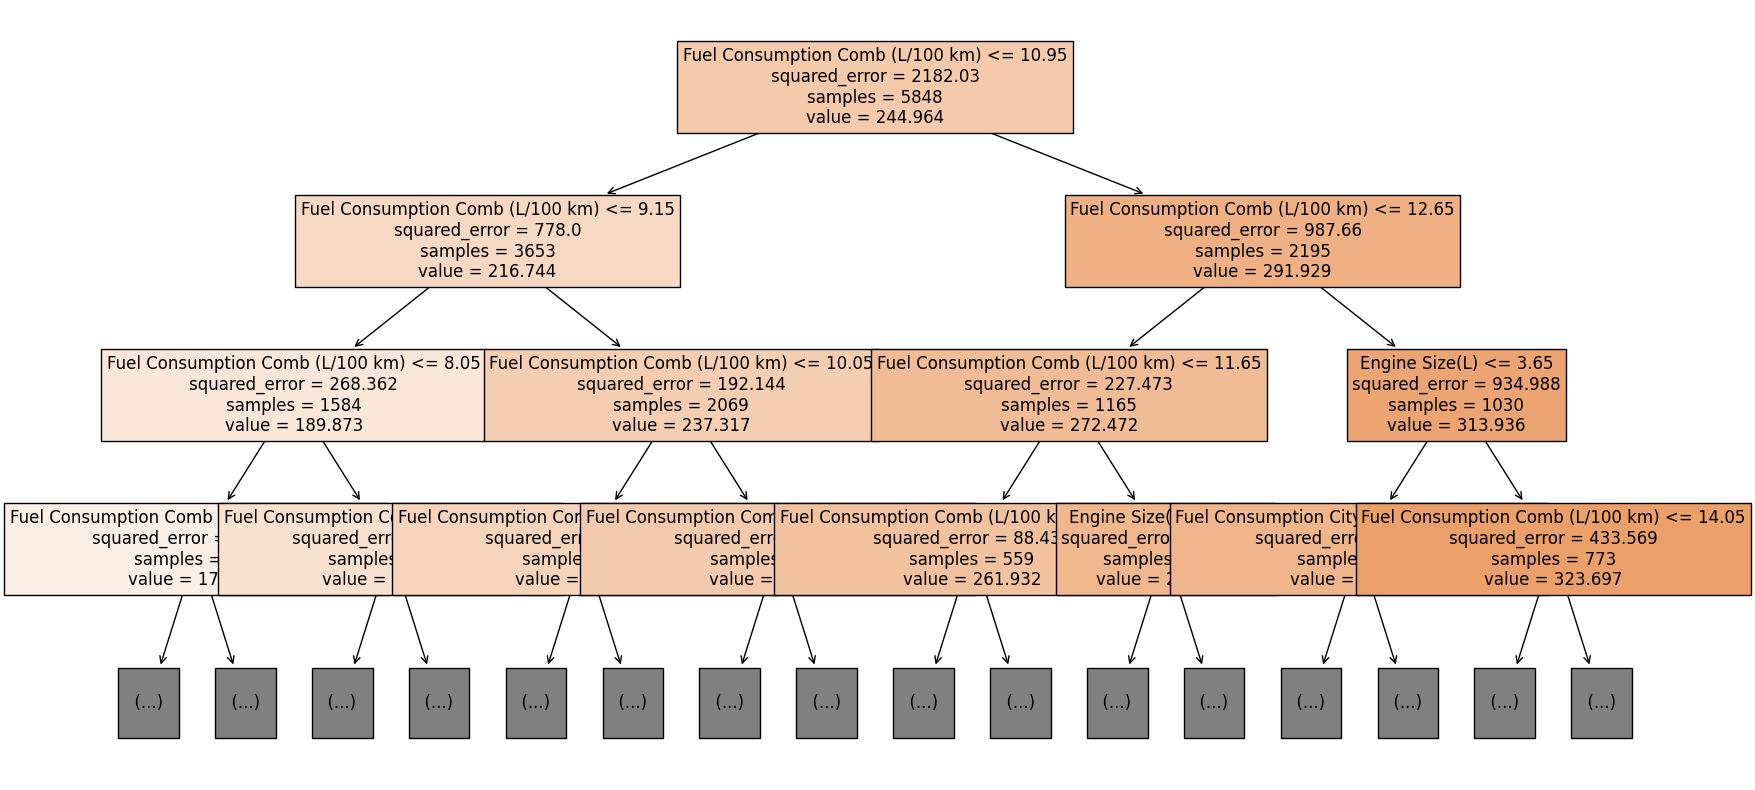

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt,filled=True,feature_names=x_train.columns,fontsize=12,max_depth=3)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf= KFold(n_splits=5,shuffle=True,random_state=0)
cv_scores = cross_val_score(rf, x, y, cv=kf, scoring='r2')
print("R² scores for each fold:", cv_scores)
print("Mean R² score:", cv_scores.mean())

R² scores for each fold: [0.97961627 0.98071856 0.97554661 0.97526525 0.97675432]
Mean R² score: 0.9775802021044843


In [ ]:
rf_pred=rf.predict(x_test)
rf_pred

array([196.91      , 186.48333333, 244.79095117, ..., 240.978     ,
       249.49      , 309.47      ])

In [ ]:
r2_score(y_test,rf_pred)

0.9798548712747003

In [ ]:
mean_squared_error(y_test,rf_pred)

41.5372258820093